# Acerca del conjunto de datos
#### Objetivo:
* "Predecir el comportamiento para retener a los clientes. Puede analizar todos los datos relevantes de los clientes y desarrollar programas enfocados de retención de clientes." [Conjuntos de datos de muestra de IBM]

#### Contenido: 
Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

#### El conjunto de datos incluye información sobre:

Clientes que se dieron de baja en el último mes - la columna se llama Churn
Servicios contratados por cada cliente: teléfono, varias líneas, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, asistencia técnica y streaming de TV y películas.
Información sobre la cuenta del cliente: antigüedad, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.
Información demográfica sobre los clientes: sexo, rango de edad y si tienen pareja o familiares a su cargo.

#### Variables del DataSet:

* customerID: Customer ID
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer 
* Churn: Whether the customer churned or not (Yes or No)

## Importación de librerias

In [754]:
import pandas as pd
import numpy as np
from numpy import mean, std
import warnings
import seaborn as sns
import matplotlib,  matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## 1) Exploración Inicial de Datos:

En un principio, examinamos las primeras líneas del conjunto de datos para comprender su estructura.

In [755]:
with open("Churn.csv", encoding= 'latin1') as f:
    for _ in range(3): 
        print(f.readline())

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn

7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No

5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No



Cargamos el archivo CSV en un objeto DataFrame.

In [756]:
data = pd.read_csv("Churn.csv")
print("Lineas y Columnas:", data.shape)

Lineas y Columnas: (7043, 21)


In [757]:
# Leemos las primeras filas del DataFrame para obtener una idea más general: estructura y 
# formato de los datos, verificación e encabezado y exploración de contenido.
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Los tipos de datos, numero de filas y nulos. 

In [758]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [759]:
# Hemos notado que hay algunas instancias de objetos cuya clase no se corresponde con el tipo de objeto que deberían ser.
# Vamos a verificar estas instancias de objetos y ajustar sus clases para que coincidan con los tipos adecuados.
data.select_dtypes(include='object').nunique()

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [760]:
data.select_dtypes(include=np.number).nunique()

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
dtype: int64

In [761]:
# Convertir de variable tipo objeto para numerico
data["TotalCharges"].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Hemos encontrado una valor problematico que no permitia realizar la conversión a numerico.

In [762]:
# Encuentra el valor en la posición 488 de la columna
valor_problematico = data["TotalCharges"].iloc[488]

# Imprime el valor y la posición
print(f"Valor en la posición 488: {valor_problematico}")


Valor en la posición 488:  


In [763]:
# Verificamos si hay mas valores no numericos en esta columna
non_numeric_rows = data.TotalCharges[~data['TotalCharges'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(non_numeric_rows)

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object


In [764]:
# Reemplazamos las cadenas vacías con NaN
data["TotalCharges"] = data["TotalCharges"].replace(' ', np.nan)

# Converti la columna en numerica
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

# Se elemina los valores nulos generados en esta coluna de esta columa 
data = data.dropna(subset=['TotalCharges'])

In [765]:
# Estadistica descriptiva (visión general de la distribución de los datos.)
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [766]:
# En el DataFrame no se encuentran valores nulos.
# Comprobemos:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2) Vizualización

### Univariante

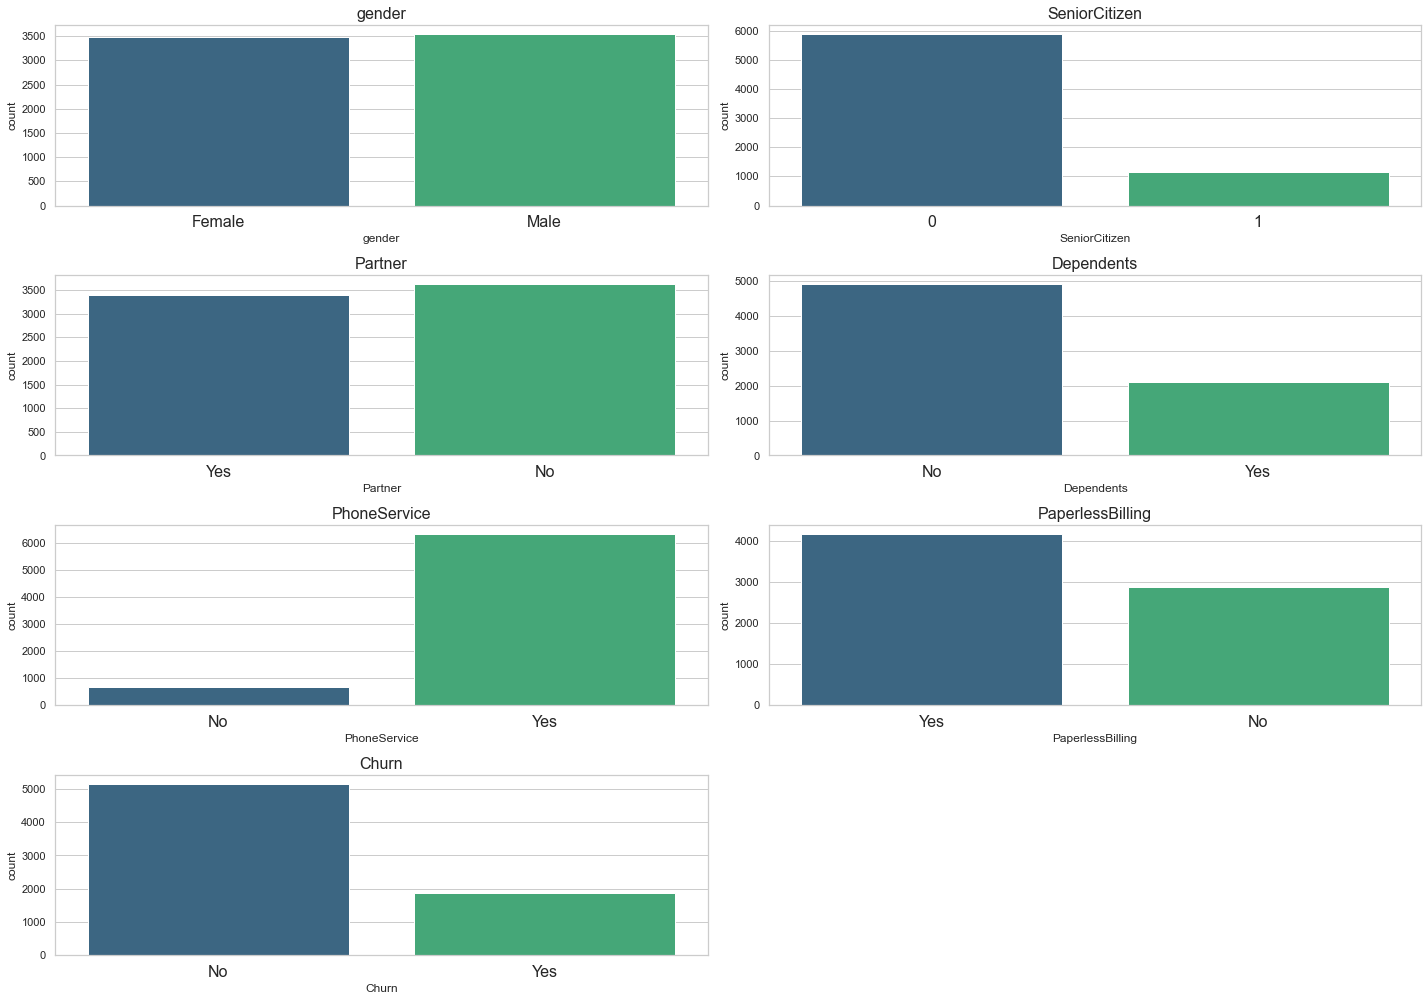

In [767]:
# Para variable de tipo bool, "yes" o "not"
bool = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'PaperlessBilling', 'Churn']

# Configurar el tamaño de la figura para mostrar varios gráficos
plt.figure(figsize=(20, 17))

# Iterar sobre las variables categóricas y mostrar los gráficos
for index, col in enumerate(bool, 1):
    plt.subplot(5, 2, index) # 4 filas y 4 columnas
    sns.countplot(x=col, data=data, palette='viridis')
    plt.xticks(fontname="Arial", fontsize=16)
    plt.title(col, fontsize = 16)

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

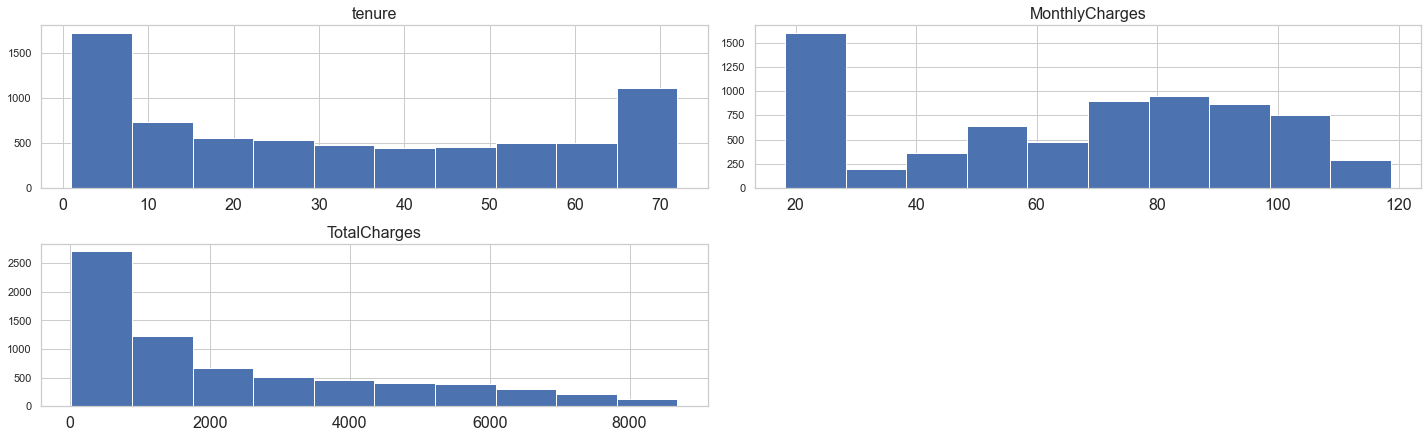

In [768]:
# variable de tipo numerica continua
number = ['tenure','MonthlyCharges', 'TotalCharges']

# Configurar el tamaño de la figura para mostrar varios gráficos
plt.figure(figsize=(20, 15))

# Iterar sobre las variables categóricas y mostrar los gráficos
for index, col in enumerate(number, 1):
    plt.subplot(5, 2, index) # 4 filas y 4 columnas
    plt.hist(data[col])
    plt.xticks(fontname="Arial", fontsize=16)
    plt.title(col, fontsize = 16)

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

El histograma refleja una mayor concentración de personas en períodos de tiempo más cortos. Este fenómeno es común y sugiere un proceso natural después de la captación, donde es habitual tener una mayor afluencia de usuarios en los primeros períodos de tiempo.

In [769]:
from scipy.stats import skew

number = ['tenure','MonthlyCharges', 'TotalCharges']
# Un valor de 0 indica simetría, un valor negativo indica asimetría negativa, 
# y un valor positivo indica asimetría positiva.

for index, col in enumerate(number, 1):
    print(col, skew(data[col]))

tenure 0.23768011839839964
MonthlyCharges -0.22205554798978874
TotalCharges 0.9614373590490068


Interpretación general de los resultados:

1. **tenure (antigüedad):** La simetría de 0.24 sugiere una ligera asimetría positiva, lo que podría indicar que hay más clientes con antigüedades más bajas y algunos clientes con antigüedades más altas. Esto podría interpretarse como una concentración de clientes relativamente nuevos.

2. **MonthlyCharges (cargos mensuales):** La simetría de -0.22 sugiere una ligera asimetría negativa, lo que podría indicar que hay más clientes con cargos mensuales más altos y algunos clientes con cargos mensuales más bajos. Esto podría interpretarse como una concentración de clientes con cargos mensuales más altos.

3. **TotalCharges (cargos totales):** La simetría de 0.96 indica una fuerte asimetría positiva. Esto sugiere que la mayoría de los clientes tienen cargos totales relativamente bajos, pero hay algunos clientes con cargos totales significativamente más altos. Esto podría interpretarse como una concentración de clientes con bajos cargos totales.

Estas interpretaciones se basan en los valores típicos de la medida de simetría, donde:
- **Simetría = 0:** La distribución es simétrica.
- **Simetría > 0:** Asimetría positiva (cola derecha).
- **Simetría < 0:** Asimetría negativa (cola izquierda).

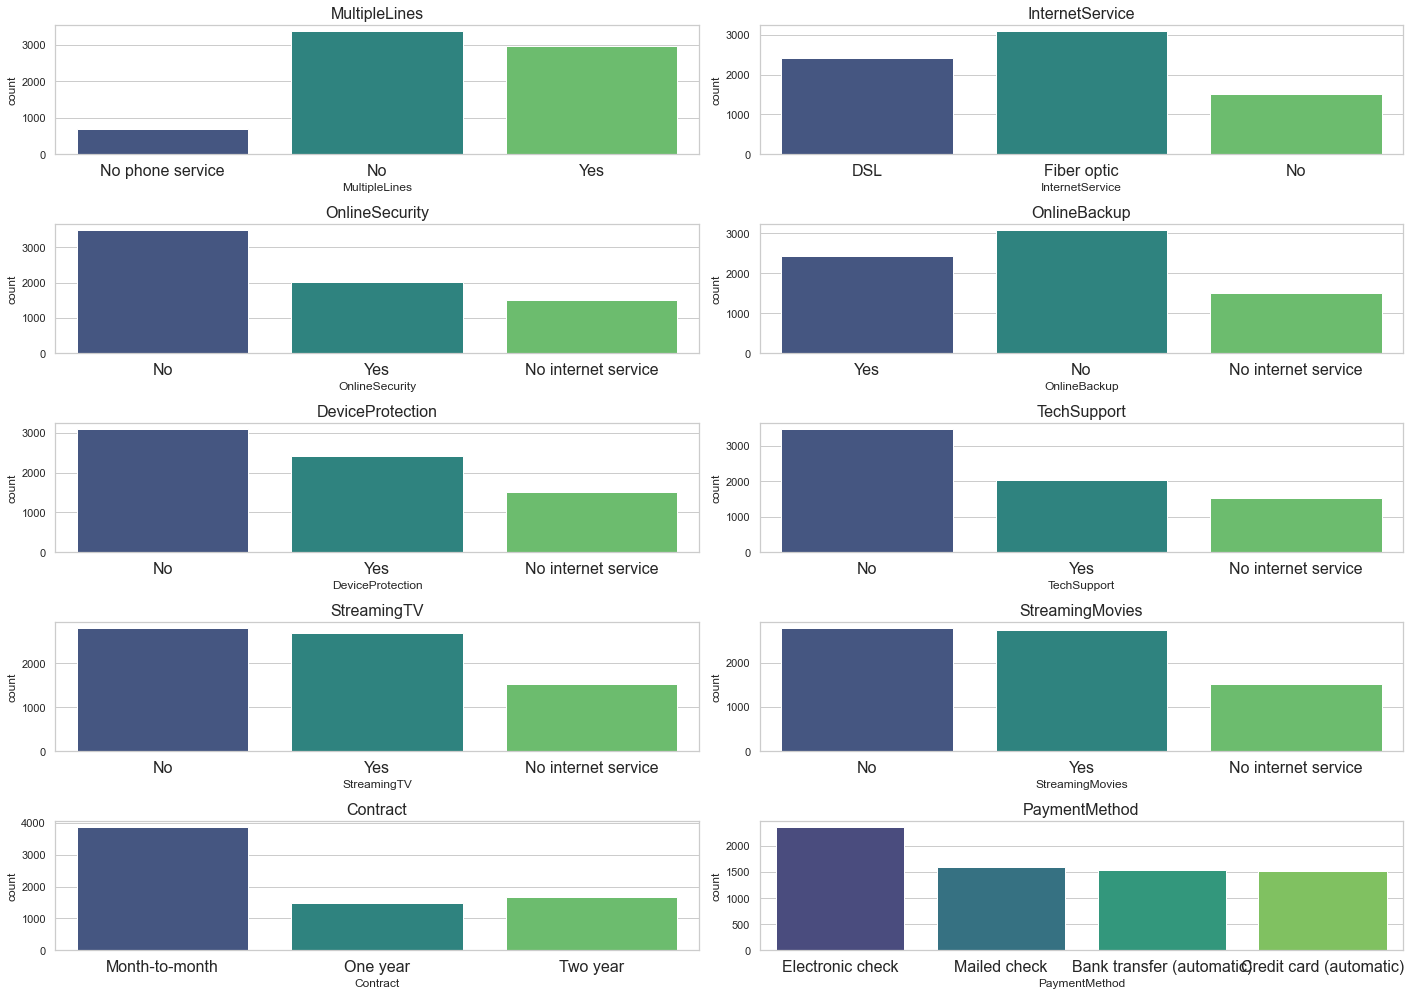

In [770]:
# Variable de tipo categorica
category = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaymentMethod']

# Configurar el tamaño de la figura para mostrar varios gráficos
plt.figure(figsize=(20, 14))

# Iterar sobre las variables categóricas y mostrar los gráficos
for index, col in enumerate(category, 1):
    plt.subplot(5, 2, index) # 4 filas y 4 columnas
    sns.countplot(x=col, data=data, palette='viridis')
    plt.xticks(fontname="Arial", fontsize=16)
    plt.title(col, fontsize = 16)

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

### Multivariante

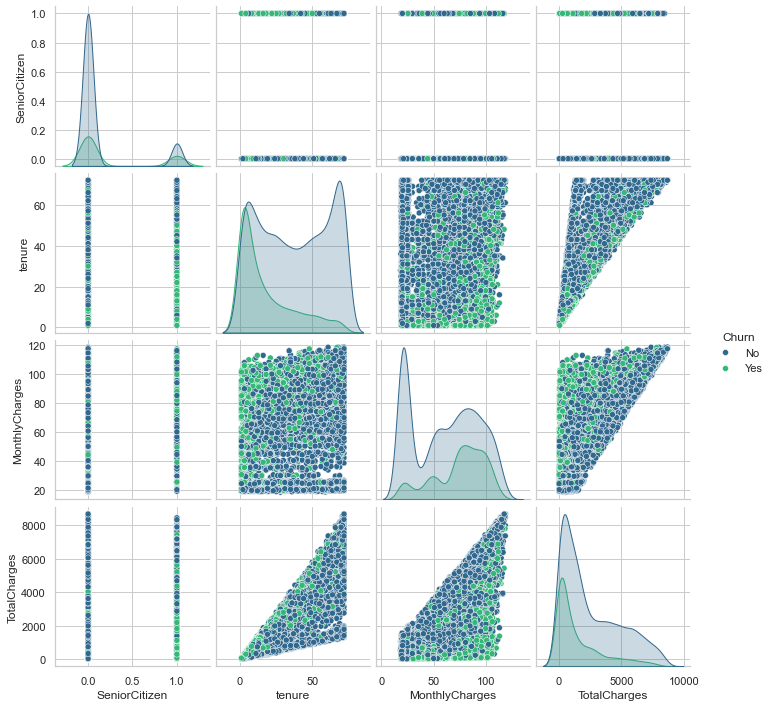

In [771]:
# Vision general de como se distribui las variables en relación al Churn
sns.pairplot(data, hue= 'Churn', palette= "viridis")

### El Churn (Verificación de las distribuciones de clases)

In [772]:
proporcion_no= round(data.Churn[data.Churn == "No"].count() / len(data)*100, 2)
proporcion_yes= round(data.Churn[data.Churn == "Yes"].count() / len(data)*100, 2)
print("Porcentage de No:", proporcion_no,"%")
print("Porcentage de Yes:", proporcion_yes, "%")
print("Diferencia entre No y Yes:", round(proporcion_no - proporcion_yes, 2), "%")
data.groupby('Churn').count()

Porcentage de No: 73.42 %
Porcentage de Yes: 26.58 %
Diferencia entre No y Yes: 46.84 %


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
No,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163,5163
Yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


La diferencia en los porcentajes entre las clases 0 y 1 indica que hay un desbalance significativo en el conjunto de datos. En este caso, la clase 0 representa aproximadamente el 73.46%, mientras que la clase 1 representa el 26.54%. Un desbalance de clases puede afectar el rendimiento de algunos modelos de aprendizaje automático, ya que el modelo podría tener dificultades para aprender patrones en la clase minoritaria.

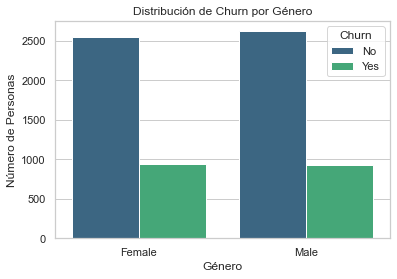

In [773]:
# Varibale de entrada y 'Churn' (variable objetivo)
sns.set_theme(style="whitegrid")
sns.countplot(x='gender', hue='Churn', data=data, palette='viridis')
plt.xlabel('Género')
plt.ylabel('Número de Personas')
plt.title('Distribución de Churn por Género')
plt.show()

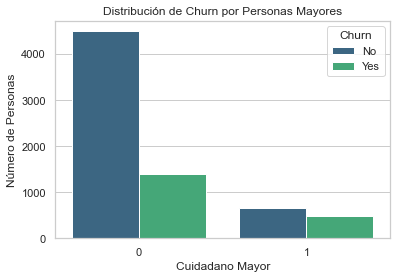

In [774]:
# Varibale de entrada y 'Churn' (variable objetivo)
sns.set_theme(style="whitegrid")
sns.countplot(x='SeniorCitizen', hue='Churn', data=data, palette='viridis')
plt.xlabel('Cuidadano Mayor')
plt.ylabel('Número de Personas')
plt.title('Distribución de Churn por Personas Mayores')
plt.show()

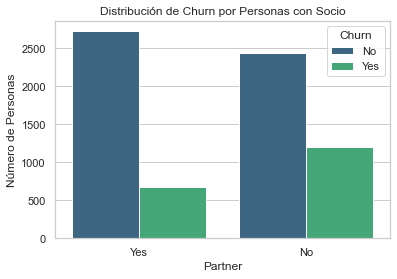

In [775]:
# Varibale de entrada y 'Churn' (variable objetivo)
sns.set_theme(style="whitegrid")
sns.countplot(x='Partner', hue='Churn', data=data, palette='viridis')
plt.xlabel('Partner')
plt.ylabel('Número de Personas')
plt.title('Distribución de Churn por Personas con Socio')
plt.show()

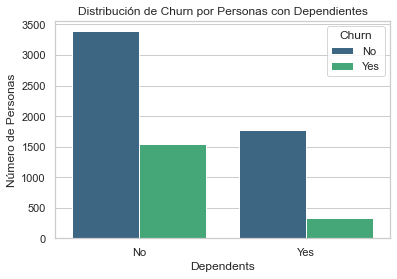

In [776]:
# Varibale de entrada y 'Churn' (variable objetivo)
sns.set_theme(style="whitegrid")
sns.countplot(x='Dependents', hue='Churn', data=data, palette='viridis')
plt.xlabel('Dependents')
plt.ylabel('Número de Personas')
plt.title('Distribución de Churn por Personas con Dependientes')
plt.show()

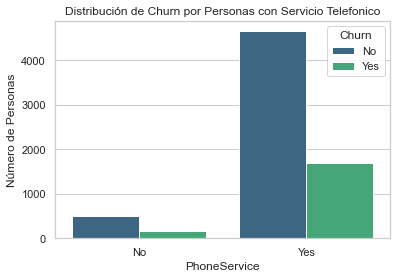

In [777]:
# Varibale de entrada y 'Churn' (variable objetivo)
sns.set_theme(style="whitegrid")
sns.countplot(x='PhoneService', hue='Churn', data=data, palette='viridis')
plt.xlabel('PhoneService')
plt.ylabel('Número de Personas')
plt.title('Distribución de Churn por Personas con Servicio Telefonico')
plt.show()

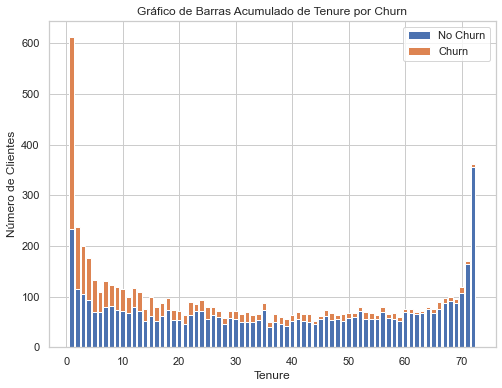

In [778]:
# Crear columnas para las dos series
valores_1 = data.loc[data['Churn'] == "No", 'tenure'].value_counts().sort_index()
valores_2 = data.loc[data['Churn'] == "Yes", 'tenure'].value_counts().sort_index()

# Alinear los índices
valores_1, valores_2 = valores_1.align(valores_2, fill_value=0)

# Crear el gráfico de barras acumulado
plt.figure(figsize=(8, 6))
plt.bar(valores_1.index, valores_1, label='No Churn')
plt.bar(valores_2.index, valores_2, bottom=valores_1, label='Churn')

# Añadir etiquetas y título
plt.xlabel('Tenure')
plt.ylabel('Número de Clientes')
plt.title('Gráfico de Barras Acumulado de Tenure por Churn')
plt.legend()

# Mostrar el gráfico
plt.show()

A medida que disminuye la duración del tiempo que un usuario permanece en la compañía, aumenta la tasa de churn. Este patrón tiene lógica, ya que una persona que ha estado más tiempo con la empresa probablemente esté satisfecha con el servicio o los beneficios que ofrece. Es posible que haya encontrado soluciones a sus necesidades y, por lo tanto, opta por permanecer.

In [779]:
# Comparaciones 

for j in ['SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']:
    reg = data[data['Churn']== 1][j].value_counts(normalize=True)
    ind = []
    for i in reg.index:
        i = str(i)
        v = j+' '+i
        ind.append(v)
        v =''

    from plotly import graph_objects as go
    fig = go.Figure(
       go.Funnel(
          y = ind,
          x = reg.values
       )
    )
    
    fig.update_layout(font_color="black", font=dict(size=7), title={
            'text': "{} (%) with Churn".format(j),
            'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        height=400,  # Ajusta la altura de la figura aquí
        width=500    # Ajusta el ancho de la figura aquí
    )
    fig.show()

## 3) Manejo de Valores Atípicos

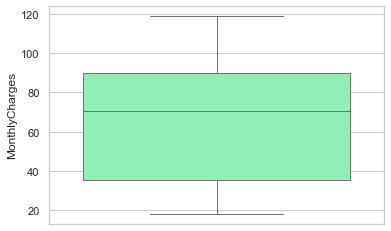

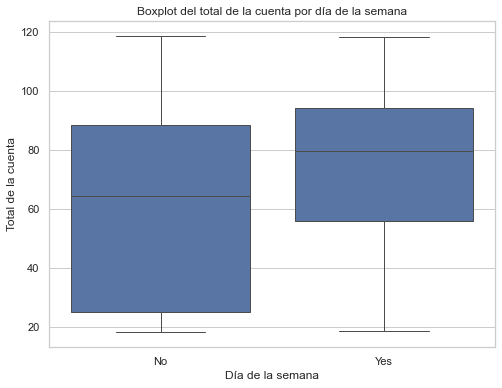

In [780]:
ax1 = sns.boxplot(y=data['MonthlyCharges'], palette="rainbow")

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn", y='MonthlyCharges', data=data)

# Añadir etiquetas y título
plt.xlabel("Día de la semana")
plt.ylabel("Total de la cuenta")
plt.title("Boxplot del total de la cuenta por día de la semana")

# Mostrar el gráfico
plt.show()

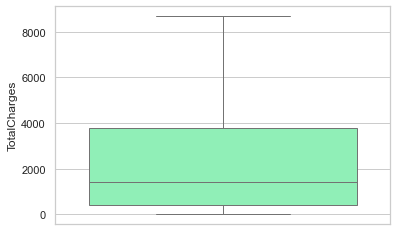

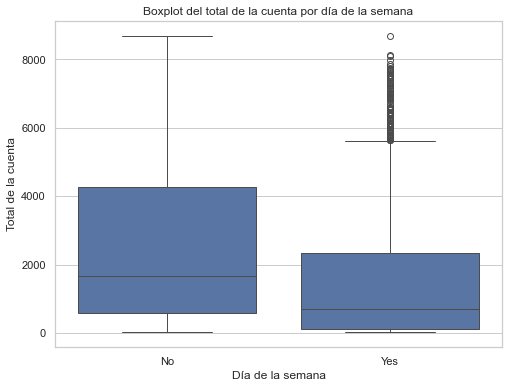

In [781]:
ax2 = sns.boxplot(y=data['TotalCharges'], palette="rainbow")

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn", y="TotalCharges", data=data)

# Añadir etiquetas y título
plt.xlabel("Día de la semana")
plt.ylabel("Total de la cuenta")
plt.title("Boxplot del total de la cuenta por día de la semana")

# Mostrar el gráfico
plt.show()


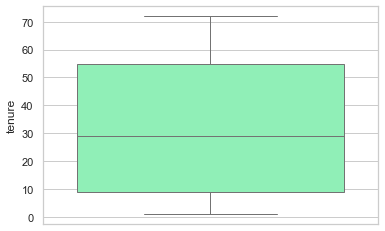

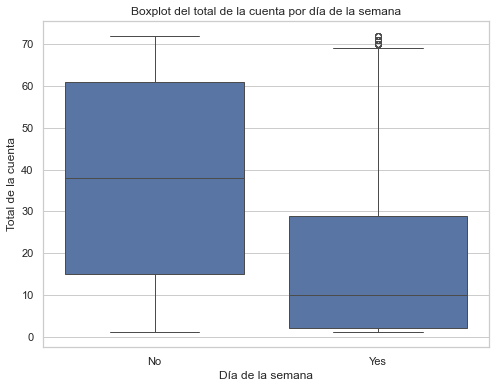

In [782]:
ax3 = sns.boxplot(y=data['tenure'], palette="rainbow")

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear un boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Churn", y="tenure", data=data)

# Añadir etiquetas y título
plt.xlabel("Día de la semana")
plt.ylabel("Total de la cuenta")
plt.title("Boxplot del total de la cuenta por día de la semana")

# Mostrar el gráfico
plt.show()


En la visualización del boxplot no se observan valores atípicos. Sin embargo, procederemos a realizar un cálculo en el cual los valores que se encuentren fuera de los límites definidos por el Rango Intercuartílico (IQR) serán considerados atípicos.

In [783]:
columnas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Calcular IQR manualmente y encontrar valores atípicos
for col in columnas:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = data[(data[col] < lower_limit) | (data[col] > upper_limit)][col]
    
    print(f'Columna: {col}, Valores atípicos: {outliers.tolist()}')

Columna: tenure, Valores atípicos: []
Columna: MonthlyCharges, Valores atípicos: []
Columna: TotalCharges, Valores atípicos: []


En relación con los valores atípicos observados en la visualización por clases, es posible que estos sean valores atípicos genuinos, indicando patrones inesperados o condiciones especiales en los datos. Además, la visibilidad de estos atípicos puede variar entre las clases debido al desbalance existente en los datos. Dada la naturaleza del problema, es normal encontrar valores extremos o inusuales, ya que un usuario puede abandonar la compañía por diversas razones en cualquier momento. Estas razones pueden incluir la finalización de una oferta de descuento sin renovación por parte del usuario o el vencimiento de un periodo de carencia, entre otras posibles circunstancias no registradas inicialmente.

## 4) Transformación de Variables

La primera modificación que llevaremos a cabo en el DataFrame consiste en excluir la variable "customerID". 

In [784]:
# La identificación del usuario no aporta información relevante a nuestro modelo.
data.drop("customerID", axis = 1, inplace=True)

* Transformación de variables categóricas en numericas.

Convertiremos las variables de tipo boolena ("yes" a 1 y "no" a 0) a variables numericas binaria donde 1 puede representar "verdadero" o "sí", y 0 puede representar "falso" o "no". Esto facilita la manipulación de la variable y su uso en modelos predictivos.

In [785]:
# Codificación de Variables
# Se realiza el cambio en las columnas que poseen los valores ["No", "Yes"]

dos_valores = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"] 
for col in dos_valores:
    # Verificar si los valores únicos son ["No", "Yes"]
    print(data[col].value_counts())
    unique_values = data[col].unique()
    if all(val in unique_values for val in ["No", "Yes" ]):
        # Mapear los valores
        data[col] = data[col].map({"No": 0, "Yes": 1})

Partner
No     3639
Yes    3393
Name: count, dtype: int64
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
PaperlessBilling
Yes    4168
No     2864
Name: count, dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [786]:
# Se realiza el mapeo y codificación
data["gender"] = data["gender"].map({"Male": 0, "Female":1})

Variables categoricas de 3 niveles.

Analizaremos cada variable individualmente para determinar si es susceptible de convertirse en variables dummy. Algunas columnas presentan información redundante, por ejemplo, "No", "Yes" y "No phone service" en la variable "MultipleLines". El nivel "No phone service" puede considerarse parte integral de "No".

* MultipleLines

In [787]:
# Contar los valores originales
data['MultipleLines'].value_counts()

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

In [788]:
# Reemplazar "No phone service" con "No" ya que la información es redundante 
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

# Se realiza el mapeo y codificación
data['MultipleLines'] = data['MultipleLines'].map({"No": 0, "Yes":1})

# Contar los valores después de la transformación
data['MultipleLines'].value_counts()

MultipleLines
0    4065
1    2967
Name: count, dtype: int64

* InternetService

In [789]:
# Contar los valores originales
data['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

* OnlineSecurity

In [790]:
# Contar los valores originales
data['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

In [791]:
# Reemplazar "No phone service" con "No" ya que la información es redundante 
data['OnlineSecurity'] = data['OnlineSecurity'].replace('No internet service', 'No')

# Se realiza el mapeo y codificación
data['OnlineSecurity'] = data['OnlineSecurity'].map({"No": 0, "Yes":1})

# Contar los valores después de la transformación
data['OnlineSecurity'].value_counts()

OnlineSecurity
0    5017
1    2015
Name: count, dtype: int64

* OnlineBackup

In [792]:
# Contar los valores originales
data['OnlineBackup'].value_counts()

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

In [793]:
# Reemplazar "No phone service" con "No" ya que la información es redundante 
data['OnlineBackup'] = data['OnlineBackup'].replace('No internet service', 'No')

# Se realiza el mapeo y codificación
data['OnlineBackup'] = data['OnlineBackup'].map({"No": 0, "Yes":1})

# Contar los valores después de la transformación
data['OnlineBackup'].value_counts()

OnlineBackup
0    4607
1    2425
Name: count, dtype: int64

* DeviceProtection

In [794]:
# Contar los valores originales
data['DeviceProtection'].value_counts()

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64

In [795]:
# Reemplazar "No phone service" con "No" ya que la información es redundante 
data['DeviceProtection'] = data['DeviceProtection'].replace('No internet service', 'No')

# Se realiza el mapeo y codificación
data['DeviceProtection'] = data['DeviceProtection'].map({"No": 0, "Yes":1})

# Contar los valores después de la transformación
data['DeviceProtection'].value_counts()

DeviceProtection
0    4614
1    2418
Name: count, dtype: int64

* TechSupport

In [796]:
# Contar los valores originales
data['TechSupport'].value_counts()

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64

In [797]:
# Reemplazar "No phone service" con "No" ya que la información es redundante 
data['TechSupport'] = data['TechSupport'].replace('No internet service', 'No')

# Se realiza el mapeo y codificación
data['TechSupport'] = data['TechSupport'].map({"No": 0, "Yes":1})

# Contar los valores después de la transformación
data['TechSupport'].value_counts()

TechSupport
0    4992
1    2040
Name: count, dtype: int64

* StreamingTV

In [798]:
# Contar los valores originales
data['StreamingTV'].value_counts()

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64

In [799]:
# Reemplazar "No phone service" con "No" ya que la información es redundante 
data['StreamingTV'] = data['StreamingTV'].replace('No internet service', 'No')

# Se realiza el mapeo y codificación
data['StreamingTV'] = data['StreamingTV'].map({"No": 0, "Yes":1})

# Contar los valores después de la transformación
data['StreamingTV'].value_counts()

StreamingTV
0    4329
1    2703
Name: count, dtype: int64

* StreamingMovies

In [800]:
# Contar los valores originales
data['StreamingMovies'].value_counts()

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64

In [801]:
# Reemplazar "No phone service" con "No" ya que la información es redundante 
data['StreamingMovies'] = data['StreamingMovies'].replace('No internet service', 'No')

# Se realiza el mapeo y codificación
data['StreamingMovies'] = data['StreamingMovies'].map({"No": 0, "Yes":1})

# Contar los valores después de la transformación
data['StreamingMovies'].value_counts()

StreamingMovies
0    4301
1    2731
Name: count, dtype: int64

* Contract

In [802]:
# Contar los valores originales
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [803]:
# Contar los valores originales
data['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

In [804]:
# Convertir en dummies
columnas_a_convertir = ['InternetService', 'Contract', 'PaymentMethod']

# Aplica la función get_dummies a las columnas seleccionadas
data_dummies = pd.get_dummies(data, columns=columnas_a_convertir, dtype=int)

data_dummies

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [805]:
data_dummies.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

* Transformación de variables para mejorar la simetría o normalidad.

In [806]:
columnas_a_transformar = ['tenure','MonthlyCharges', 'TotalCharges']

In [807]:
# Estrategia con Box Generalizado
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson')
data_dummies[columnas_a_transformar] = power_transformer.fit_transform(data_dummies[columnas_a_transformar])

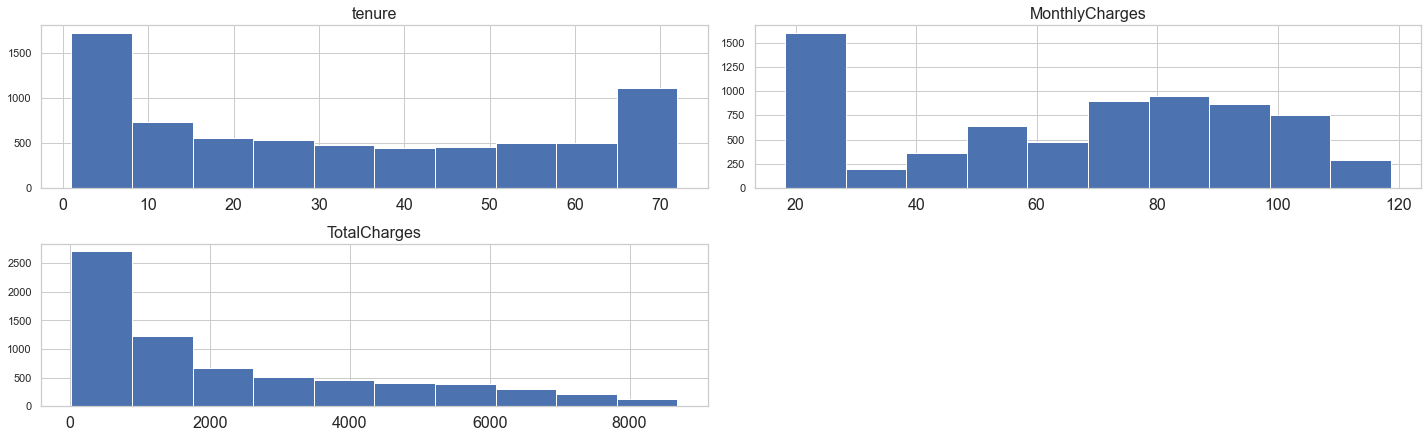

In [808]:
# Configurar el tamaño de la figura para mostrar varios gráficos
plt.figure(figsize=(20, 15))

# Iterar sobre las variables categóricas y mostrar los gráficos
for index, col in enumerate(columnas_a_transformar, 1):
    plt.subplot(5, 2, index) # 4 filas y 4 columnas
    plt.hist(data[col])
    plt.xticks(fontname="Arial", fontsize=16)
    plt.title(col, fontsize = 16)

# Ajustar el diseño y mostrar la figura
plt.tight_layout()
plt.show()

* Escalar las variables

In [809]:
from sklearn.preprocessing import MinMaxScaler

# Supongamos que 'data' es tu DataFrame y 'columnas' es la lista de columnas a escalar
columnas = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler_minmax = MinMaxScaler()
data_dummies[columnas] = scaler_minmax.fit_transform(data_dummies[columnas])

# Convierte las columnas escaladas de vuelta a un DataFrame
data_dummies = pd.DataFrame(data_dummies, columns=data_dummies.columns)


In [810]:
# from sklearn.preprocessing import StandardScaler

# # Supongamos que 'data' es tu DataFrame y 'columnas' es la lista de columnas a escalar
# columnas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scaler_standard = StandardScaler()
# data_dummies[columnas] = scaler_standard.fit_transform(data[columnas])

# # Convierte las columnas escaladas de vuelta a un DataFrame
# data_standard = pd.DataFrame(data_dummies, columns=data_dummies.columns)


## 5) Análisis de Correlación y Multicolinealidad

La "caja" representa el rango intercuartílico (IQR), que es la diferencia entre el primer cuartil (Q1) y el tercer cuartil (Q3). Cuanto más alto sea el IQR, más "variable" serán las correlaciones. Esto significa que las correlaciones pueden variar más ampliamente entre diferentes variables con respecto a la variable en cuestión.

Por otro lado, si el IQR es más pequeño, las correlaciones son más consistentes y tienen menos variabilidad. En otras palabras, las correlaciones tienden a ser más similares entre las diferentes variables en relación con la variable específica que estás observando en ese momento

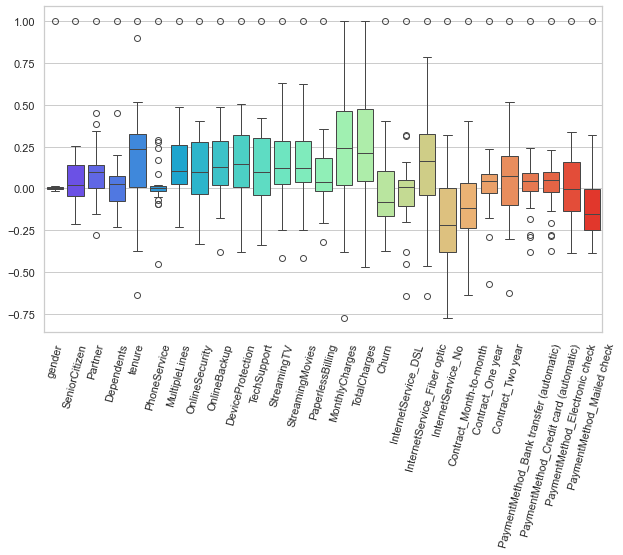

In [811]:
data_num = data_dummies.select_dtypes(np.number)
# Vizualización
plt.figure(figsize=(10,6))
#sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data = data_num.corr(),  palette="rainbow")
ax.get_xticklabels()
plt.xticks(rotation = 75)
plt.show()

* 0.00 - 0.19: Muy débil o ninguna correlación.
* 0.20 - 0.39: Correlación débil.
* 0.40 - 0.59: Correlación moderada.
* 0.60 - 0.79: Correlación fuerte.
* 0.80 - 1.00: Correlación muy fuerte.

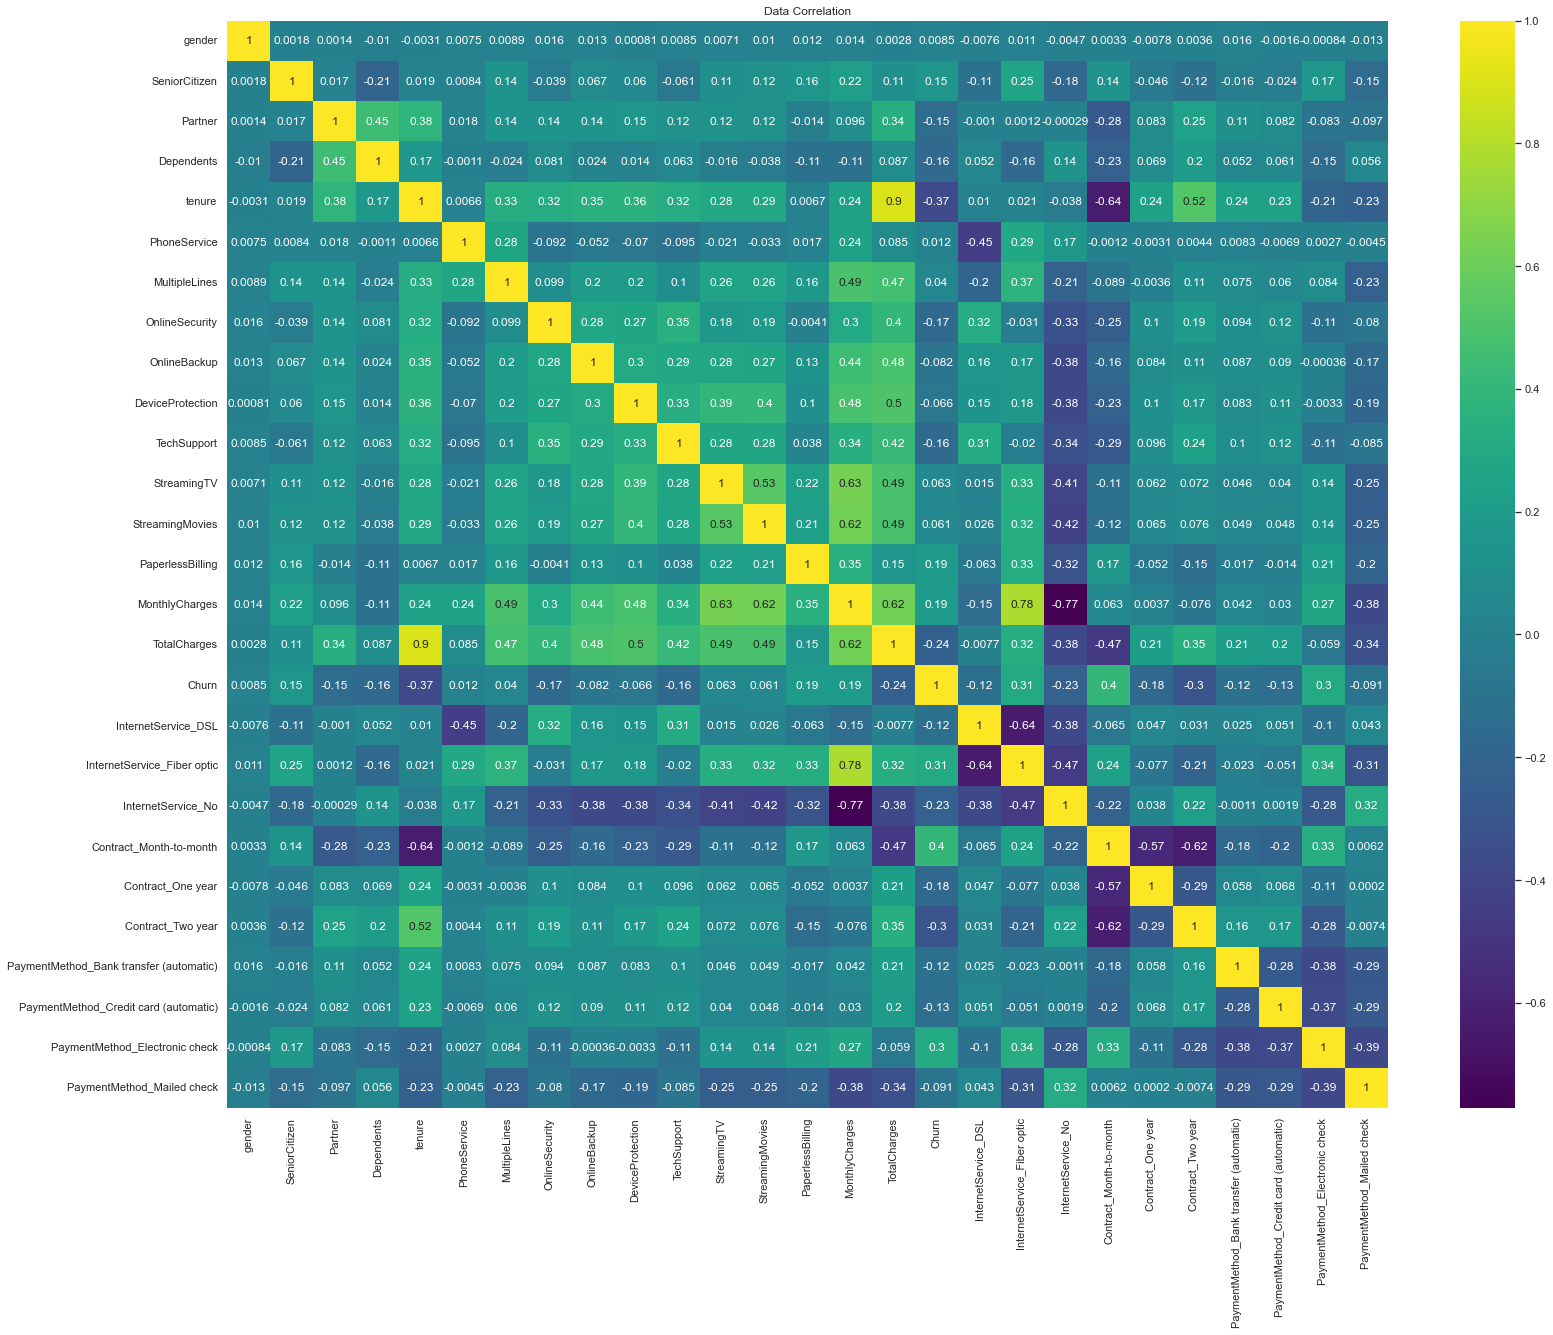

In [812]:
colores = palette='viridis'

# Vizualizamos la correlación
plt.figure(figsize = (26,20))
sns.heatmap(data_num.corr(), annot = True, cmap = colores)
plt.title('Data Correlation')
plt.show()

Eliminamos los casos de multicolinealidad.
El criterio para la eliminación de variables consiste en excluir aquellas que presentan una multicolinealidad alta, definida como una correlación entre variables independientes mayor o igual al 75%. Además, se considera la correlación con la variable objetivo, y se tiende a conservar aquellas variables que tienen una correlación más significativa con la variable objetivo.

In [813]:
# Se crea un nuevo DataFrame sin los casos de multicolinealidad
data_cleaned = data_dummies.copy()

# Se excluyen las que cumplen con el criterio
data_cleaned = data_cleaned.drop(['TotalCharges', 'MonthlyCharges' ],axis=1)

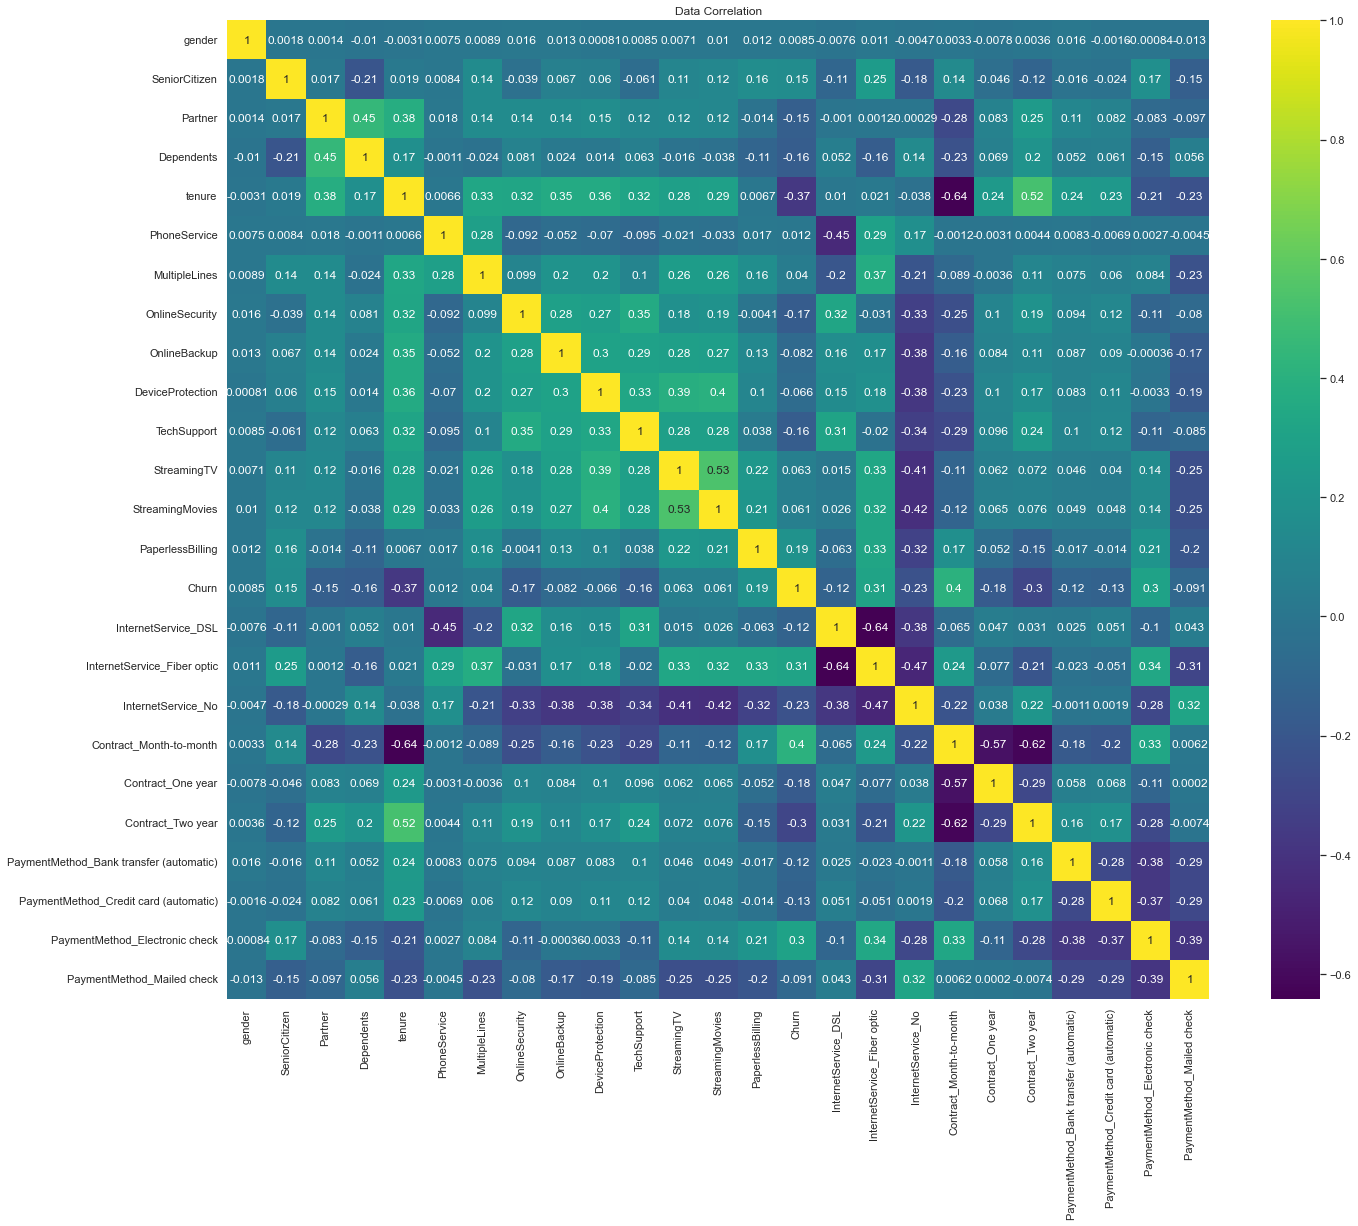

In [814]:
colores = palette='viridis'

# Vizualizamos la correlación
data_num = data_cleaned.select_dtypes(np.number)
plt.figure(figsize = (22,18))
sns.heatmap(data_num.corr(), annot = True, cmap = colores)
plt.title('Data Correlation')
plt.show()

## 7) Partición de Datos

In [815]:
# Define los normalizadores que deseas probar
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, RobustScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


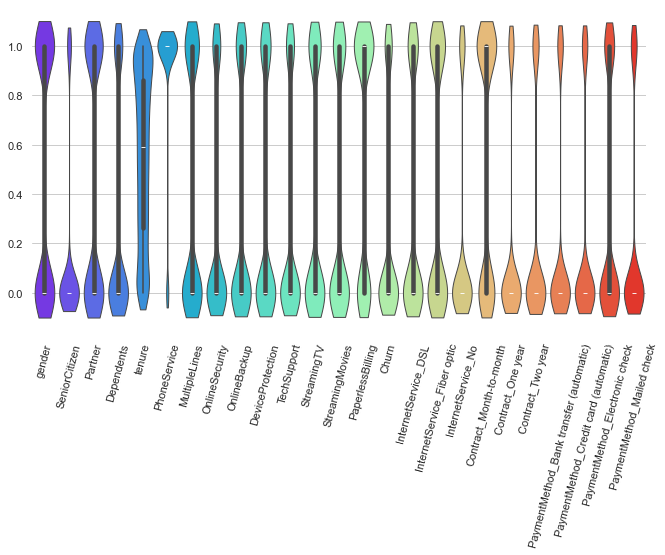

In [816]:
# Como hemos identificado previamente, el dataframe contiene valores atípicos genuinos, los cuales se mantendrán 
# sin ninguna modificación. En esta sección, empleamos el gráfico de violín para ilustrar la distribución de los datos 
# en una variable específica y para visualizar la densidad correspondiente. Este enfoque nos permite obtener una 
# representación visual detallada de la variabilidad y densidad de la distribución de la variable en cuestión.

# Set up the matplotlib figure
sns.set_theme(style="whitegrid")
plt.figure(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
ax = sns.violinplot(data_cleaned.select_dtypes(np.number), palette="rainbow", bw=.2, cut=1, linewidth=1)

# Finalize the figure
sns.despine(left=True, bottom=True)
# Imprimir las etiquetas del eje x
ax.get_xticklabels()
plt.xticks(rotation = 75)
plt.show()

In [817]:
# Dividir en variables de entrada y a predecir
X = data_cleaned.loc[:, data_cleaned.columns != 'Churn']
y = data_cleaned.loc[:, data_cleaned.columns == 'Churn']

# Convertir en dtype numerico
X = X.astype(np.number)
y = y.astype(np.number)

c:\Users\jmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

c:\Users\jmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

c:\Users\jmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

c:\Users\jmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `f

In [818]:
# Dividir en variables de entrada y a predecir
X_d = data_dummies.loc[:, data_dummies.columns != 'Churn']
y_d = data_dummies.loc[:, data_dummies.columns == 'Churn']

# Convertir en dtype numerico
X_d = X_d.astype(np.number)
y_d= y_d.astype(np.number)

c:\Users\jmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

c:\Users\jmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

c:\Users\jmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.

c:\Users\jmoll\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\dtypes\common.py:1691: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `f

In [819]:
from sklearn.model_selection import train_test_split

In [820]:
# Data frame con multicolinealidad eliminada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data frame con columnas que presentabam multicolinealida
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

## 8) Validación cruzada

In [821]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC # kernel rfb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [822]:
# Se crear un modelo
# class_weight='balanced'
LogisticRegres= LogisticRegressionCV()
DecisionTree = DecisionTreeClassifier()
RandomForest = RandomForestClassifier()
SMV_Kernel = SVC(kernel='rbf', C=1.0)
mpl = MLPClassifier()

* DataFrame data_cleaned

In [823]:
from sklearn.model_selection import cross_validate

results1 = cross_validate(LogisticRegres, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results2 = cross_validate(mpl, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results3 = cross_validate(DecisionTree, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results4 = cross_validate(RandomForest, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results5 = cross_validate(SMV_Kernel, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)

* DataFrame data_dummies

In [824]:
# Realizar validación cruzada en el DataFrame data_dummies

results1d = cross_validate(LogisticRegres, X_train_d, y_train_d, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results2d = cross_validate(mpl, X_train_d, y_train_d, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results3d = cross_validate(DecisionTree, X_train_d, y_train_d, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results4d = cross_validate(RandomForest, X_train_d, y_train_d, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results5d = cross_validate(SMV_Kernel, X_train_d, y_train_d, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)

* Imprimi los resultados

In [825]:
# Imprimir los resultados
print("\nLogisticRegressionCV:")
print("Accuracy:", results1['test_accuracy'].mean())
print("ROC AUC:", results1['test_roc_auc'].mean())

print("\nLogisticRegressionCV Dummies:")
print("Accuracy:", results1d['test_accuracy'].mean())
print("ROC AUC:", results1d['test_roc_auc'].mean())


LogisticRegressionCV:
Accuracy: 0.8101333333333333
ROC AUC: 0.8503664353332739

LogisticRegressionCV Dummies:
Accuracy: 0.8097777777777779
ROC AUC: 0.8512790820086324


In [826]:
print("\nMLPClassifier:")
print("Accuracy:", results2['test_accuracy'].mean())
print("ROC AUC:", results2['test_roc_auc'].mean())

print("\nMLPClassifier Dummies:")
print("Accuracy:", results2d['test_accuracy'].mean())
print("ROC AUC:", results2d['test_roc_auc'].mean())


MLPClassifier:
Accuracy: 0.7927111111111111
ROC AUC: 0.8286094892579786

MLPClassifier Dummies:
Accuracy: 0.7914666666666667
ROC AUC: 0.832662547474633


In [827]:
print("\nDecisionTreeClassifie:")
print("Accuracy:", results3['test_accuracy'].mean())
print("ROC AUC:", results3['test_roc_auc'].mean())

print("\nDecisionTreeClassifie Dummies::")
print("Accuracy:", results3d['test_accuracy'].mean())
print("ROC AUC:", results3d['test_roc_auc'].mean())


DecisionTreeClassifie:
Accuracy: 0.7256888888888888
ROC AUC: 0.6626762331257542

DecisionTreeClassifie Dummies::
Accuracy: 0.736
ROC AUC: 0.6668106764274782


In [828]:
print("\nRandomForestClassifier:")
print("Accuracy:", results4['test_accuracy'].mean())
print("ROC AUC:", results4['test_roc_auc'].mean())

print("\nRandomForestClassifier Dummies:")
print("Accuracy:", results4d['test_accuracy'].mean())
print("ROC AUC:", results4d['test_roc_auc'].mean())


RandomForestClassifier:
Accuracy: 0.7856
ROC AUC: 0.8175237069489096

RandomForestClassifier Dummies:
Accuracy: 0.7962666666666667
ROC AUC: 0.8301509470632535


In [829]:
print("\nSMV_Kernel Dummies:")
print("Accuracy:", results5d['test_accuracy'].mean())
print("ROC AUC:", results5d['test_roc_auc'].mean())

print("\nSMV_Kernel:")
print("Accuracy:", results5['test_accuracy'].mean())
print("ROC AUC:", results5['test_roc_auc'].mean())


SMV_Kernel Dummies:
Accuracy: 0.8003555555555554
ROC AUC: 0.8178504619919507

SMV_Kernel:
Accuracy: 0.7989333333333333
ROC AUC: 0.8201818814935985


De acuerdo con las métricas ROC AUC y precisión, el modelo que mejor se desempeña es LogisticRegressionCV, pero todavia no tenemos claro cual escoger. Avaliaremos las demas metricas.

## 9) Traning y Test

In [830]:
# Entrenar el modelo
from sklearn.metrics import roc_auc_score, accuracy_score

# DataCleaned
LogisticRegres.fit(X_train, y_train)

# Realizar predicciones de probabilidades en el conjunto de entrenamiento y prueba
y_train_pred_proba = LogisticRegres.predict_proba(X_train)[:, 1]
y_test_pred_proba = LogisticRegres.predict_proba(X_test)[:, 1]

# Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias
umbral = 0.5
y_train_pred = (y_train_pred_proba >= umbral).astype(int)
y_test_pred = (y_test_pred_proba >= umbral).astype(int)

# Calcular la precisión y la ROC-AUC en los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Imprimir la precisión en ambos conjuntos
print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("ROC-AUC en el conjunto de entrenamiento:", roc_auc_train)

Precisión en el conjunto de entrenamiento: 0.8106666666666666
ROC-AUC en el conjunto de entrenamiento: 0.7287390575526169


In [831]:
from sklearn.metrics import classification_report

In [832]:
print("ROC-AUC en el conjunto de prueba:", roc_auc_test)
print(classification_report(y_test, y_test_pred))

ROC-AUC en el conjunto de prueba: 0.7041559033188212
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87      1033
         1.0       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [833]:
LogisticRegres.fit(X_train_d, y_train_d)

# # Realizar predicciones de probabilidades en el conjunto de entrenamiento y prueba
y_train_pred_proba = LogisticRegres.predict_proba(X_train_d)[:, 1]
y_test_pred_proba = LogisticRegres.predict_proba(X_test_d)[:, 1]

#Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias
umbral = 0.5
y_train_pred = (y_train_pred_proba >= umbral).astype(int)
y_test_pred = (y_test_pred_proba >= umbral).astype(int)

# Calcular la precisión y la ROC-AUC en los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Imprimir la precisión en ambos conjuntos
print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("ROC-AUC en el conjunto de entrenamiento:", roc_auc_train)

Precisión en el conjunto de entrenamiento: 0.8120888888888889
ROC-AUC en el conjunto de entrenamiento: 0.7290674321993408


In [834]:
print("ROC-AUC en el conjunto de prueba:", roc_auc_test)
print(classification_report(y_test, y_test_pred))

ROC-AUC en el conjunto de prueba: 0.6971025671555253
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1033
         1.0       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Dado que la problemática se centra en predecir si un cliente dejará la empresa (clase positiva, 1), la métrica más relevante en este caso suele ser la sensibilidad o recall. La sensibilidad mide la proporción de casos positivos reales que se han identificado correctamente. Es crucial en situaciones en las que la clase positiva representa un evento importante que deseas detectar, como en la retención de clientes, por esto será la metrica que usaremos para selecionar el mejor modelo.

In [835]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo de regresión logística
logistic_model = LogisticRegression()

# Definir los parámetros que deseas probar
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Inicializar la búsqueda en cuadrícula
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='roc_auc')

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Predecir en los datos de prueba
y_pred = grid_search.predict(X_test)

# Calcular el área bajo la curva ROC en los datos de prueba
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Área bajo la curva ROC en datos de prueba: {roc_auc}")

print(classification_report(y_test, y_pred))

Mejores parámetros: {'C': 10, 'penalty': 'l2'}
Área bajo la curva ROC en datos de prueba: 0.6973562284193797
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1033
         1.0       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Hemos explorado varias estrategias para llegar al modelo que mostrara la mejor sensibilidad. Las estrategias incluyeron el trabajo con dos dataframes, donde realizamos validación cruzada para determinar cuál de ellos ofrecía el mejor rendimiento. Uno de los dataframes incluía todas las variables, mientras que en el otro eliminamos aquellas variables que presentaban casos de multicolinealidad.

En ambos casos, aplicamos el parámetro "class_weight='balanced'" al modelo para equilibrar las clases, pero los resultados fueron más prometedores sin dicho parámetro. El modelo que mostró el mejor rendimiento fue el dataframe completo sin el parámetro class_weight. El siguiente paso fue optimizar los parámetros de este modelo con GridSearch, pero una vez más, el modelo con los parámetros por defecto superó en rendimiento.